In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import numpy as np
import utils
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [3]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
data = data.loc[:, data.columns.notna()]
data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [4]:
# Tìm các cột không phải là số (numeric)
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
print("Các cột không phải kiểu số:")
print(non_numeric_cols)


Các cột không phải kiểu số:
['proto_tcp', 'proto_udp']


In [5]:
#Tách cột target ra khỏi dữ liệu
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
X,_ = Preprocessing.scale_data(X)
# X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
#chưa áp dụng smotesmote
X_train_nsm, X_test_nsm, y_train_nsm, y_test_nsm = train_test_split(X,y, test_size=0.2, random_state=42)

#áp dụng smote
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm, y_train_sm = Preprocessing.apply_smote(X_train_sm, y_train_sm)

In [7]:
# Preprocessing.plot_heatmap(X_train_sm[list['Feature']], y_train_sm,'Attack_type')

In [8]:
# Preprocessing.plot_heatmap(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train,'Attack_type')

Train với dữ liệu chưa giảm chiều

In [9]:
# x2 = X_train[list['Feature']].drop(dropped_columns, axis=1)

In [10]:
# print(len(X_train.columns))

In [ ]:
model_LinearSVC = model.model_LinearSVC(X_train_sm, y_train_sm)
y_pred = model_LinearSVC.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

In [ ]:
model_xgboost = model.model_xgboost(X_train_sm, y_train_sm,12)
y_pred = model_xgboost.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [01:39:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1588
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       870
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      1.00      0.99       485
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1624
          11       0.97      1.00      0.98        56

    accuracy                           1.00     24624
   macro avg       0.95      0.96      0.95     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1569     0     0     0     0     1     0     0     3     2    12     1]
 [    0   100  

In [ ]:
model_logistic_regression = model.model_logistic_regression(X_train_sm, y_train_sm)
y_pred = model_logistic_regression.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1440
           1       0.99      0.73      0.84       135
           2       1.00      1.00      1.00     18897
           3       1.00      0.99      1.00       877
           4       0.83      0.09      0.16        56
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.87      0.84      0.85       503
           9       0.99      1.00      1.00       381
          10       0.94      0.94      0.94      1629
          11       0.91      0.60      0.73        88

    accuracy                           0.98     24624
   macro avg       0.92      0.79      0.83     24624
weighted avg       0.98      0.98      0.98     24624

Confusion Matrix:
 [[ 1354     0     0     1     1     1     0     0    36     2    43     2]
 [   11    99  

In [ ]:
model_knn = model.model_knn(X_train_sm, y_train_sm)
y_pred = model_knn.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1585
           1       0.97      0.98      0.97        99
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.45      0.59        11
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00       394
           7       1.00      1.00      1.00       220
           8       0.98      0.99      0.99       485
           9       0.99      1.00      1.00       381
          10       0.98      0.98      0.98      1622
          11       0.91      0.98      0.95        54

    accuracy                           1.00     24624
   macro avg       0.94      0.90      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1547     2     0     1     0     1     0     0     4     2    26     2]
 [    1    97  

In [ ]:
model_random_forest = model.model_random_forest(X_train_sm, y_train_sm)
y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       0.96      0.98      0.97        98
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       873
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1618
          11       0.95      1.00      0.97        55

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     1     0     0     0     0     4     2    17     2]
 [    0    96  

In [ ]:
model_mlp = model.model_mlp(X_train_sm, y_train_sm, input_size=X_train_sm.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=1000)
y_pred = model.predict_mlp(model_mlp, X_test_sm)
utils.report(y_pred, y_test_sm)

Đang huấn luyện trên: cuda
Epoch [1/1000], Loss: 2.4972
Epoch [10/1000], Loss: 2.3295
Epoch [20/1000], Loss: 2.0358
Epoch [30/1000], Loss: 1.6495
Epoch [40/1000], Loss: 1.2782
Epoch [50/1000], Loss: 1.0032
Epoch [60/1000], Loss: 0.8148
Epoch [70/1000], Loss: 0.6726
Epoch [80/1000], Loss: 0.5602
Epoch [90/1000], Loss: 0.4725
Epoch [100/1000], Loss: 0.4223
Epoch [110/1000], Loss: 0.3772
Epoch [120/1000], Loss: 0.3497
Epoch [130/1000], Loss: 0.3322
Epoch [140/1000], Loss: 0.2998
Epoch [150/1000], Loss: 0.2880
Epoch [160/1000], Loss: 0.2797
Epoch [170/1000], Loss: 0.2676
Epoch [180/1000], Loss: 0.2570
Epoch [190/1000], Loss: 0.2555
Epoch [200/1000], Loss: 0.2381
Epoch [210/1000], Loss: 0.2310
Epoch [220/1000], Loss: 0.2284
Epoch [230/1000], Loss: 0.2176
Epoch [240/1000], Loss: 0.2129
Epoch [250/1000], Loss: 0.2044
Epoch [260/1000], Loss: 0.2021
Epoch [270/1000], Loss: 0.1951
Epoch [280/1000], Loss: 0.1932
Epoch [290/1000], Loss: 0.1880
Epoch [300/1000], Loss: 0.1818
Epoch [310/1000], Loss:

Train với dữ liệu đã giảm chiều

c:\Users\QUIN\Desktop\PPNCKH\DataProcessing.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


40


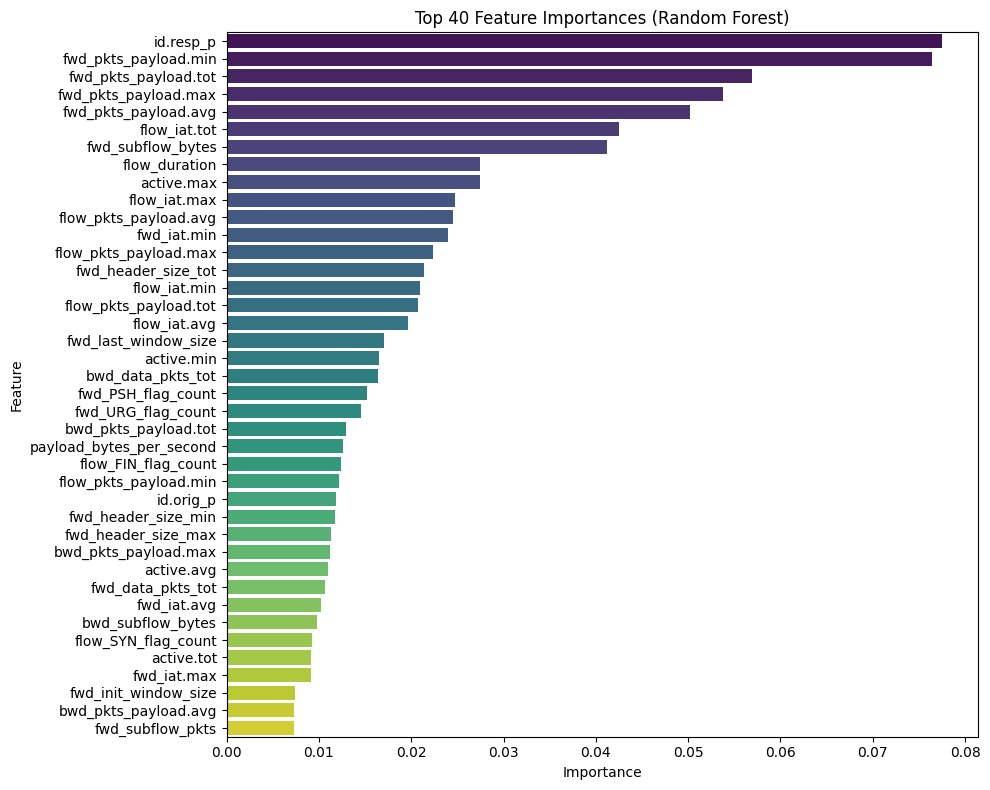

In [ ]:
# Xử lý dữ liệu
list = DataProcessing.select_feature(X_train_sm, y_train_sm)
print(len(list))

In [ ]:
X_train_sm = X_train_sm[list['Feature']]
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train_sm[list['Feature']], threshold=0.8)

Các cột bị loại bỏ: ['fwd_iat.avg', 'bwd_subflow_bytes', 'fwd_header_size_max', 'fwd_init_window_size', 'bwd_data_pkts_tot', 'fwd_data_pkts_tot', 'bwd_pkts_payload.max', 'flow_SYN_flag_count', 'bwd_pkts_payload.avg', 'active.avg', 'fwd_pkts_payload.avg', 'flow_iat.avg', 'fwd_iat.max', 'active.min', 'flow_pkts_payload.max', 'flow_duration', 'bwd_pkts_payload.tot']


In [ ]:
X_train_sm_dr = df_reduced
X_test_sm_dr = X_test_sm[list['Feature']].drop(dropped_columns, axis=1)
y_train_sm_dr = y_train_sm.copy()
y_test_sm_dr = y_test_sm.copy()

In [ ]:
model_LinearSVC_dr = model.model_LinearSVC(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_LinearSVC_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73      1950
           1       0.70      0.71      0.71        98
           2       1.00      1.00      1.00     18900
           3       1.00      0.99      0.99       877
           4       0.83      0.08      0.14        63
           5       0.67      0.25      0.36         8
           6       1.00      0.99      1.00       396
           7       1.00      0.92      0.96       238
           8       0.87      0.81      0.83       525
           9       0.99      0.99      0.99       385
          10       0.60      0.87      0.71      1129
          11       0.53      0.56      0.55        55

    accuracy                           0.96     24624
   macro avg       0.83      0.74      0.75     24624
weighted avg       0.96      0.96      0.96     24624

Confusion Matrix:
 [[ 1292     0     0     1     1     1     0     0    38     2   602    13]
 [   20    70  

In [ ]:
model_xgboost_dr = model.model_xgboost(X_train_sm_dr, y_train_sm_dr,12)
y_pred_dr = model_xgboost_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [01:43:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1592
           1       1.00      0.99      1.00       101
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       870
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       485
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1620
          11       0.97      1.00      0.98        56

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1571     0     0     0     0     0     0     0     3     2    16     0]
 [    0   100  

In [ ]:
model_logistic_regression_dr = model.model_logistic_regression(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_logistic_regression_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81      1344
           1       0.97      0.63      0.77       153
           2       1.00      1.00      1.00     18901
           3       1.00      0.99      0.99       874
           4       0.83      0.07      0.13        70
           5       0.67      0.20      0.31        10
           6       1.00      0.97      0.98       405
           7       1.00      0.92      0.96       239
           8       0.87      0.82      0.84       520
           9       0.99      1.00      1.00       381
          10       0.89      0.89      0.89      1635
          11       0.74      0.47      0.57        92

    accuracy                           0.97     24624
   macro avg       0.89      0.74      0.77     24624
weighted avg       0.97      0.97      0.97     24624

Confusion Matrix:
 [[ 1180     0     0     1     1     1     0     0    37     2   114     8]
 [   19    97  

In [ ]:
model_knn_dr = model.model_knn(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_knn_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1580
           1       0.98      0.97      0.98       101
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.45      0.59        11
           5       0.67      1.00      0.80         2
           6       1.00      0.99      1.00       395
           7       1.00      0.99      0.99       222
           8       0.98      0.99      0.99       485
           9       0.99      1.00      1.00       381
          10       0.98      0.98      0.98      1624
          11       0.90      0.95      0.92        55

    accuracy                           1.00     24624
   macro avg       0.94      0.94      0.93     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1544     2     0     1     0     1     0     1     3     2    24     2]
 [    2    98  

In [ ]:
model_random_forest_dr = model.model_random_forest(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_random_forest_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1594
           1       0.98      0.98      0.98       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       873
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       488
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1612
          11       0.95      0.95      0.95        58

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1568     0     0     0     0     0     0     0     4     2    18     2]
 [    0    98  

In [ ]:
model_mlp_dr = model.model_mlp(X_train_sm_dr, y_train_sm_dr, input_size=X_train_sm_dr.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=1000)



Đang huấn luyện trên: cuda
Epoch [1/1000], Loss: 2.4953
Epoch [10/1000], Loss: 2.4007
Epoch [20/1000], Loss: 2.2168
Epoch [30/1000], Loss: 1.9395
Epoch [40/1000], Loss: 1.6585
Epoch [50/1000], Loss: 1.4312
Epoch [60/1000], Loss: 1.2345
Epoch [70/1000], Loss: 1.0753
Epoch [80/1000], Loss: 0.9510
Epoch [90/1000], Loss: 0.8526
Epoch [100/1000], Loss: 0.7598
Epoch [110/1000], Loss: 0.6815
Epoch [120/1000], Loss: 0.6196
Epoch [130/1000], Loss: 0.5675
Epoch [140/1000], Loss: 0.5291
Epoch [150/1000], Loss: 0.4936
Epoch [160/1000], Loss: 0.4707
Epoch [170/1000], Loss: 0.4503
Epoch [180/1000], Loss: 0.4364
Epoch [190/1000], Loss: 0.4054
Epoch [200/1000], Loss: 0.3965
Epoch [210/1000], Loss: 0.3855
Epoch [220/1000], Loss: 0.3657
Epoch [230/1000], Loss: 0.3627
Epoch [240/1000], Loss: 0.3424
Epoch [250/1000], Loss: 0.3423
Epoch [260/1000], Loss: 0.3256
Epoch [270/1000], Loss: 0.3218
Epoch [280/1000], Loss: 0.3110
Epoch [290/1000], Loss: 0.3078
Epoch [300/1000], Loss: 0.2869
Epoch [310/1000], Loss:

In [ ]:
y_pred_dr = model.predict_mlp(model_mlp_dr, X_test_sm_dr)
utils.report(y_pred_dr, y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1539
           1       0.99      0.73      0.84       135
           2       1.00      1.00      1.00     18897
           3       1.00      0.99      1.00       877
           4       0.83      0.07      0.14        67
           5       0.67      0.09      0.16        22
           6       1.00      0.97      0.98       406
           7       1.00      0.91      0.95       241
           8       0.87      0.98      0.92       432
           9       0.99      1.00      1.00       381
          10       0.92      0.96      0.94      1556
          11       0.88      0.72      0.79        71

    accuracy                           0.98     24624
   macro avg       0.92      0.78      0.80     24624
weighted avg       0.98      0.98      0.98     24624

Confusion Matrix:
 [[ 1401     0     0     1     1     1     0     0    39     2    93     1]
 [    9    99  

Train mô hỉnh tinh chỉnh.

In [ ]:

y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

random_forest

In [ ]:
#test
# Không gian tham số
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10)
}

# Khởi tạo mô hình
get_random_forest_model_instance = model.get_random_forest_model() 
# Tìm kiếm ngẫu nhiên
random_search = RandomizedSearchCV(
    estimator=get_random_forest_model_instance,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro'
)

# Huấn luyện
random_search.fit(X_train, y_train)

# In tham số tốt nhất
print("Best params:", random_search.best_params_)

XGBoost

In [ ]:
# Không gian tham số
# Tính scale_pos_weight
class_counts = np.bincount(y_train_sm_dr)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, class_counts.max() / class_counts.min()]  # Xử lý mất cân bằng
}



# Khởi tạo mô hình
xgb_model = model.get_xgboost_model(random_state=42)

# Tìm kiếm ngẫu nhiên
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Số lần thử ngẫu nhiên
    cv=5,       # Cross-validation với 5 fold
    scoring='f1_macro',  # Dùng f1_macro để đánh giá tốt hơn với dữ liệu mất cân bằng
    random_state=42,
    n_jobs=-1    # Sử dụng tất cả CPU
)

# Huấn luyện
random_search_xgb.fit(X_train_sm_dr, y_train_sm_dr)

# Lấy mô hình tốt nhất
best_xgb_model = random_search_xgb.best_estimator_
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

# Dự đoán và đánh giá
y_pred_xgb = best_xgb_model.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_pred_xgb, y_test_sm_dr)


Logistic Regression

In [ ]:
# Định nghĩa không gian tham số cho Logistic Regression
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced', None]  # Xử lý mất cân bằng
}

# Khởi tạo mô hình
lr_model = model.get_logistic_regression_model(random_state=42)

# Tìm kiếm ngẫu nhiên
random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_dist_lr,
    n_iter=10,
    cv=5,
    scoring='f1_macro',  # Phù hợp với dữ liệu mất cân bằng
    random_state=42,
    n_jobs=-1
)

# Huấn luyện
random_search_lr.fit(X_train_sm_dr, y_train_sm_dr)

# Lấy mô hình tốt nhất
best_lr_model = random_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)

# Dự đoán và đánh giá
y_pred_lr = best_lr_model.predict(X_test_sm_dr)
print("Logistic Regression Classification Report:")
utils.report(y_test_sm_dr, y_pred_lr)

KNN

In [ ]:
# Định nghĩa không gian tham số cho KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo mô hình
knn_model = model.get_knn_model()

# Tìm kiếm ngẫu nhiên
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Huấn luyện
random_search_knn.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_knn_model = random_search_knn.best_estimator_
print("Best parameters for KNN:", random_search_knn.best_params_)

# Dự đoán và đánh giá
y_pred_knn = best_knn_model.predict(X_test_sm_dr)
print("KNN Classification Report:")
utils.report(y_test_sm_dr, y_pred_knn)